In [ ]:
%matplotlib qt

### Test edf_reader

In [2]:
from preprocessing.edf_reader import load_edf_data

In [ ]:
edf_path = '/data/raw/BIDS_Siena/sub-00/sub-00_ses-01_task-szMonitoring_run-00_eeg.edf'
raw = load_edf_data(edf_path)

EDF file loaded successfully!
Shape of EEG data: (19, 672000)
Sampling frequency: 256.0 Hz
Channels: ['Fp1-Avg', 'F3-Avg', 'C3-Avg', 'P3-Avg', 'O1-Avg', 'F7-Avg', 'T3-Avg', 'T5-Avg', 'Fz-Avg', 'Cz-Avg', 'Pz-Avg', 'Fp2-Avg', 'F4-Avg', 'C4-Avg', 'P4-Avg', 'O2-Avg', 'F8-Avg', 'T4-Avg', 'T6-Avg']
Using matplotlib as 2D backend.


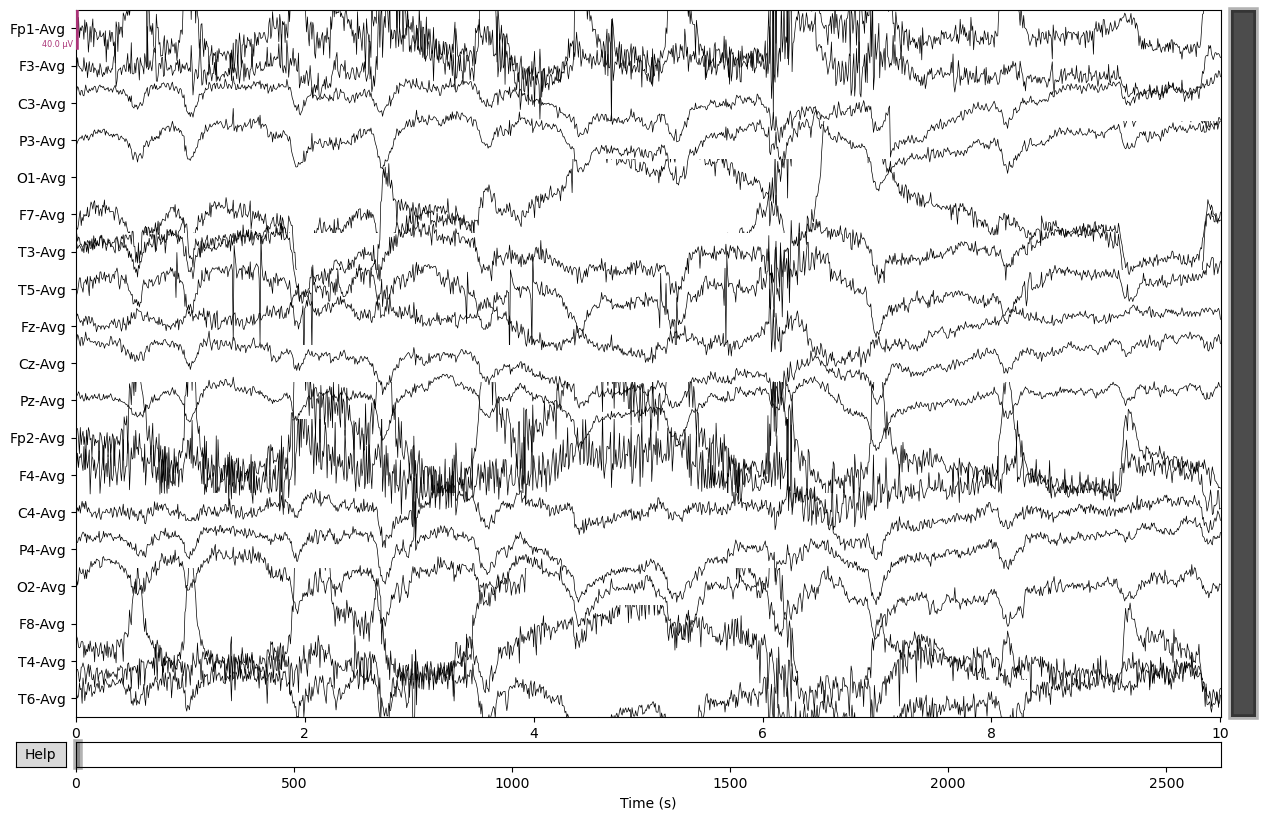

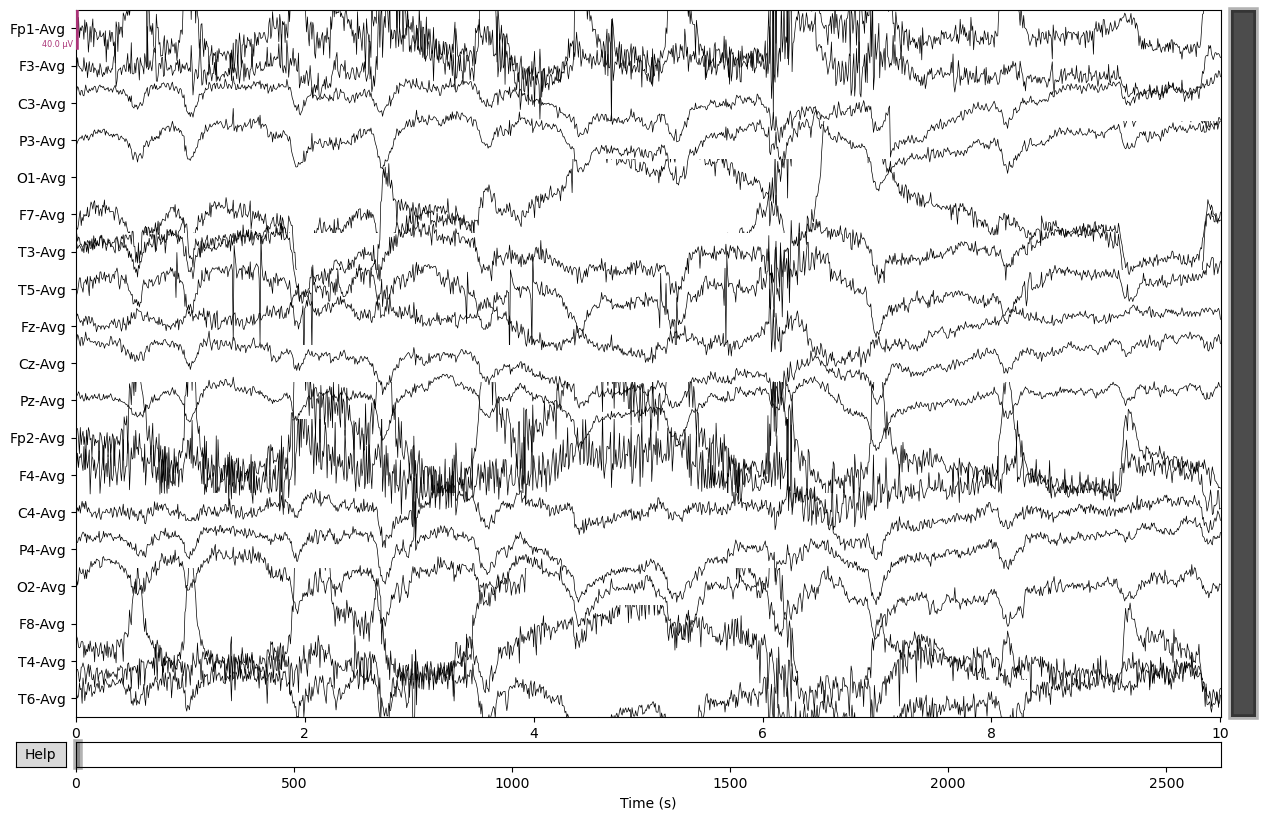

In [5]:
print("EDF file loaded successfully!")
print(f"Shape of EEG data: {raw.get_data().shape}")
print(f"Sampling frequency: {raw.info["sfreq"]} Hz")
print(f"Channels: {raw.ch_names}")

raw.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/var/folders/93/57660hkx2_19lvq4ybf3vbb40000gn/T/ipykernel_24390/2847632005.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()
/Applications/anaconda3/envs/peemai01/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


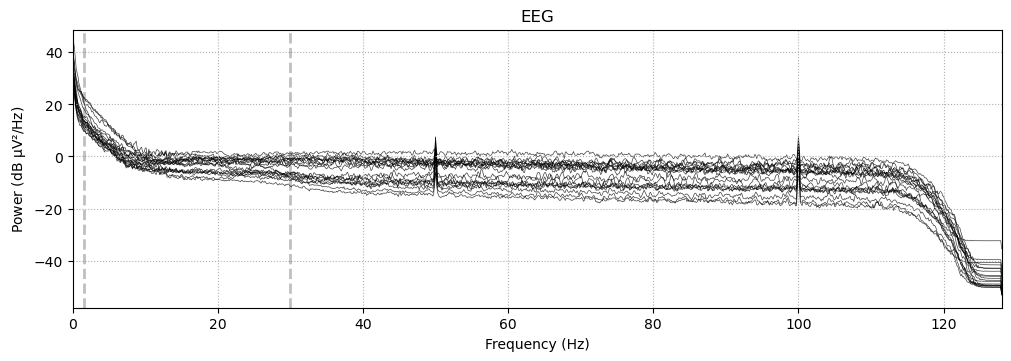

In [6]:
raw.plot_psd()

### Test filter

In [7]:
from preprocessing.filter_utils import (rename_channels_standard, apply_montage,apply_filters, run_ica_artifact_removal)

In [8]:
prep = raw.copy()
prep = rename_channels_standard(prep)
prep = apply_montage(prep)
prep = apply_filters(prep)
prep = run_ica_artifact_removal(prep)

print("Preprocessing complete!")

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


Not setting metadata
2625 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 2625 events and 129 original time points ...
1 bad epochs dropped
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by explained variance: 16 components
Fitting ICA took 1.5s.
Effective window size : 16.000 (s)
Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 15 ICA components
    Projecting back using 19 PCA components
Using EOG channel: Fp1
Applying ICA to Raw instance
    Transforming to ICA space (16 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components
Preprocessing complete!


In [9]:
prep.info

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, Fz, Cz, Pz, Fp2, F4, C4, P4, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 19
 projs: []
 sfreq: 128.0 Hz
 subject_info: <subject_info | his_id: X, sex: 0, last_name: X>
>

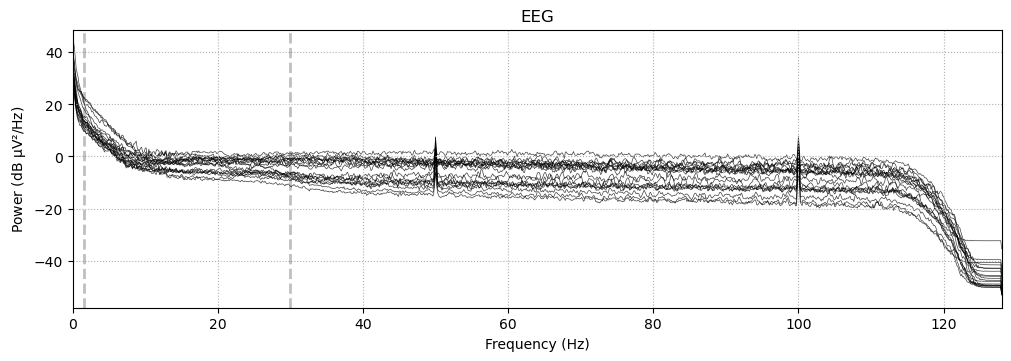

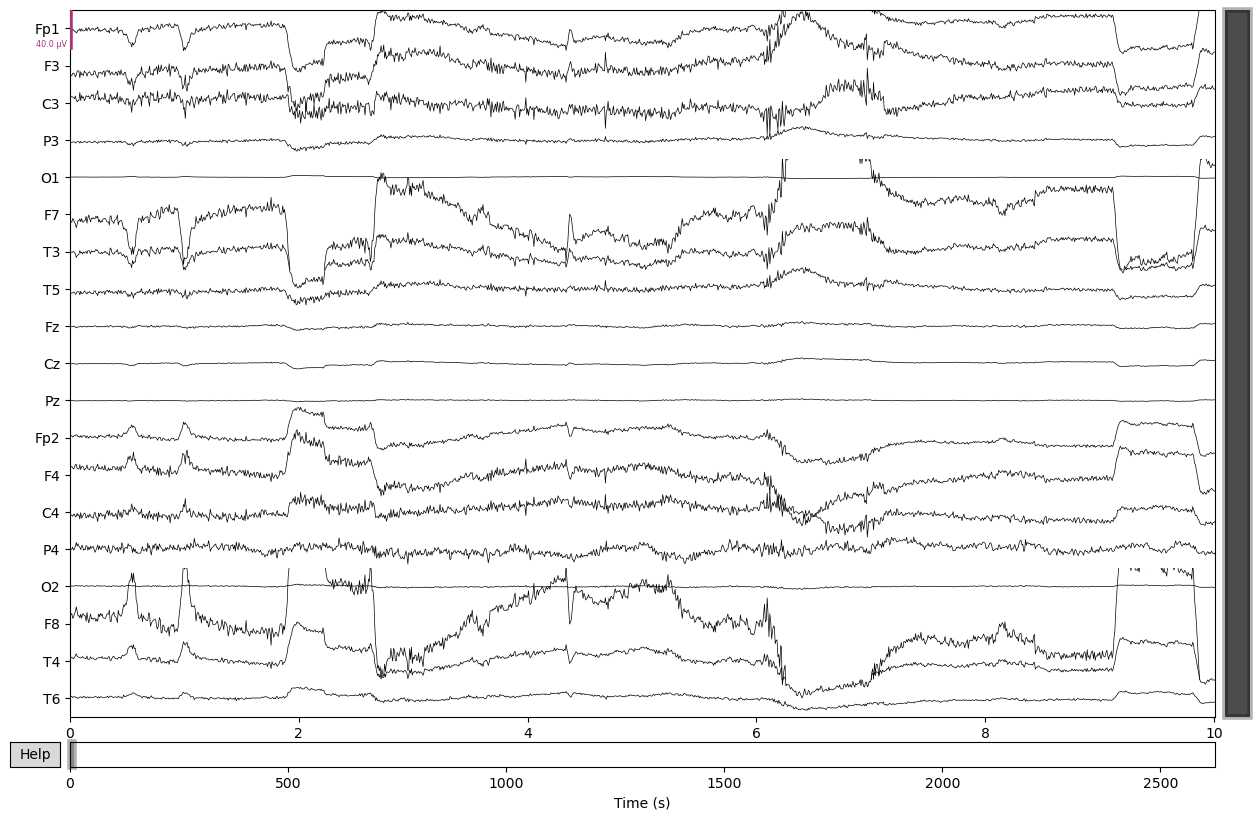

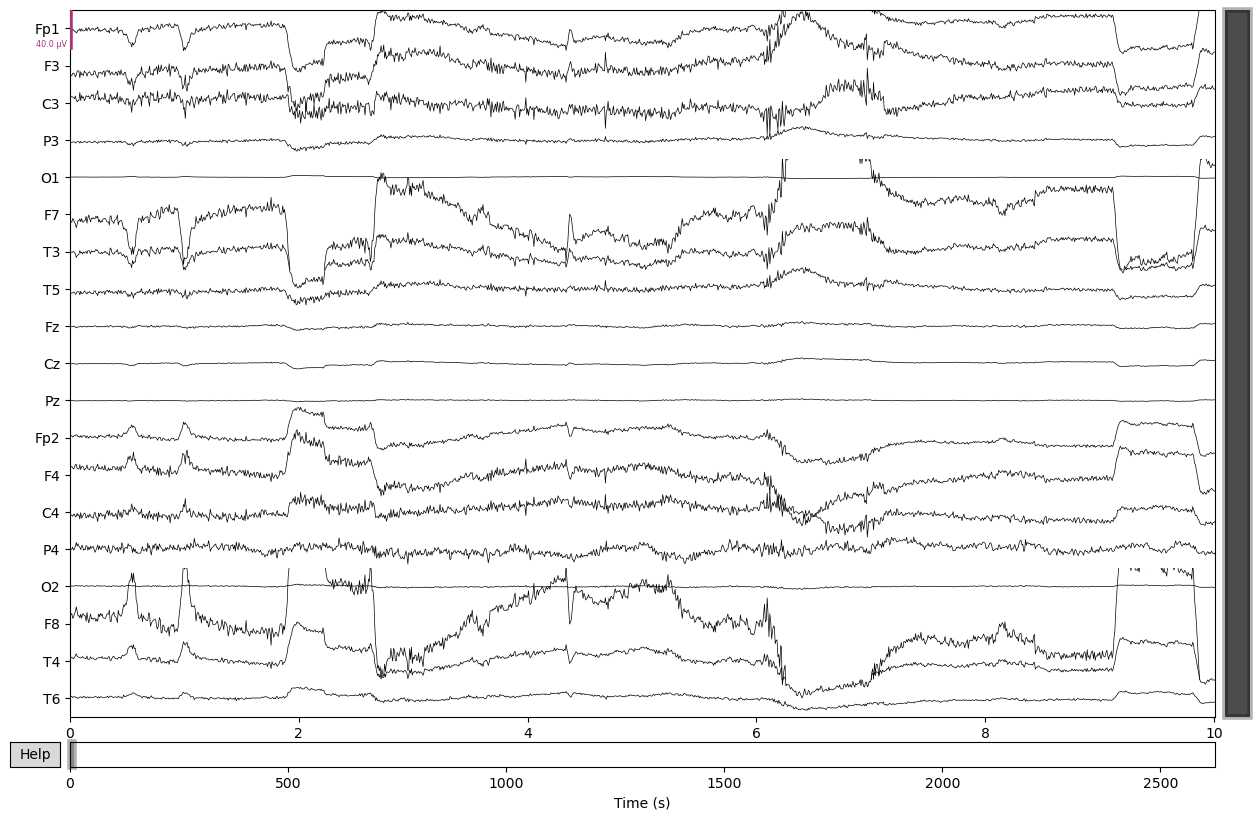

In [10]:
prep.plot()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


/Applications/anaconda3/envs/peemai01/lib/python3.12/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


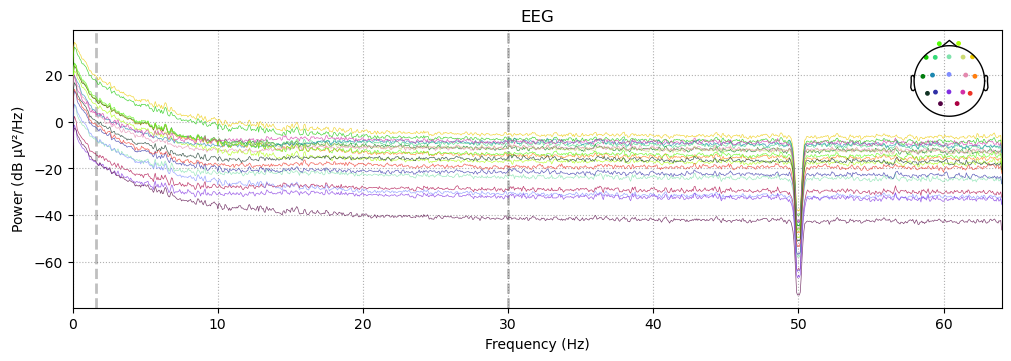

In [11]:
prep.plot_psd()

In [17]:
prep.get_data().shape = (19, 336000)

(19, 336000)

### Test load_annotation + widowing

In [ ]:
from preprocessing.load_annotation import load_annotation
from preprocessing.windowing import create_windows

tsv_path = '/data/annotations/sub-00/sub-00_ses-01_task-szMonitoring_run-00_events.tsv'
seizure_intervals = load_annotation(tsv_path)
print(seizure_intervals) # [(sfreq * start_time(sec), sfreq * end_time(sec)), ...]

data = prep.get_data()
windows, labels = create_windows(data, seizure_intervals)
print(windows.shape) # (num_windows, num_channels=19, window_size(sfreq=128 * sec=5))
print(labels.shape)  # (num_windows, window_size)

[(146304, 155264)]
(1049, 19, 640)
(1049, 640)


### Check processed data

In [ ]:
import numpy as np

d = np.load('/data/processed/uncleaned/sub-00.npz', allow_pickle=True)
lst = d.files

for key in d.files:
    print(f"{key}: shape = {d[key].shape}")

for item in lst:
    print(item)
    print(d[item])

X: shape = (4665, 19, 640)
y: shape = (4665, 640)
subject_id: shape = ()
run_ids: shape = (4665,)
X
[[[ 6.15742658e-06  4.93217198e-06 -9.78548552e-06 ... -4.65445554e-05
   -4.41965179e-05 -2.71175614e-05]
  [-4.45280560e-06 -2.88378689e-06  6.95900451e-06 ... -4.90569882e-06
   -1.10929417e-05 -1.93023367e-05]
  [ 3.09115306e-06  8.36259652e-06  1.03614703e-05 ... -2.81989037e-05
   -3.42957070e-05 -3.56855137e-05]
  ...
  [-1.30046376e-05 -1.78065373e-05 -1.94682249e-05 ...  1.33119852e-04
    1.41969730e-04  1.52957570e-04]
  [-3.18040702e-06  6.37732472e-07 -1.49993106e-06 ...  5.92953108e-05
    7.18065921e-05  7.84405257e-05]
  [-3.51064132e-07  4.24022613e-06  2.78062912e-06 ... -1.19888120e-05
   -1.29547278e-05 -8.50278473e-06]]

 [[-1.91134850e-05 -1.65147916e-05 -7.42989188e-06 ... -2.12414709e-05
   -2.50332860e-05 -1.69604162e-05]
  [-5.55629605e-06  5.13157420e-06 -2.24864681e-06 ... -4.17313591e-06
   -1.66015982e-05 -1.38857116e-05]
  [ 2.07199345e-06  5.63028000e-06  

In [ ]:
# from preprocessing.run import preprocess_subject
# import glob
# import os

# raw_dir = ''
# ann_dir = '' # ***
# out_cleaned = 'cleaned'
# out_uncleaned = 'uncleaned'

# edf_files = glob.glob(os.path.join(raw_dir, '**/*.edf'), recursive=True)

# for edf_path in edf_files:
#     base = os.path.basename(edf_path).replace('_eeg.edf', '')
#     subj = base.split('_')[0]
#     ann_path = edf_path.replace('raw', 'annotations').replace('_eeg.edf', '_events.tsv')

#     # Cleaned version
#     preprocess_subject(edf_path, ann_path, out_cleaned, apply_artifact_correction=True)

#     # Uncleaned version
#     preprocess_subject(edf_path, ann_path, out_uncleaned, apply_artifact_correction=False)

In [ ]:
import os
import numpy as np

path = '/data/processed/cleaned/sub-03.npz'
size_mb = os.path.getsize(path) / (1024 * 1024)

print(f"{size_mb:.2f} MB")

data = np.load(path)
print(data.files)
print(data['X'].shape)
print(data['y'].shape)


3108.72 MB
['X', 'y', 'subject_id', 'run_ids']
(34884, 19, 640)
(34884, 640)


###